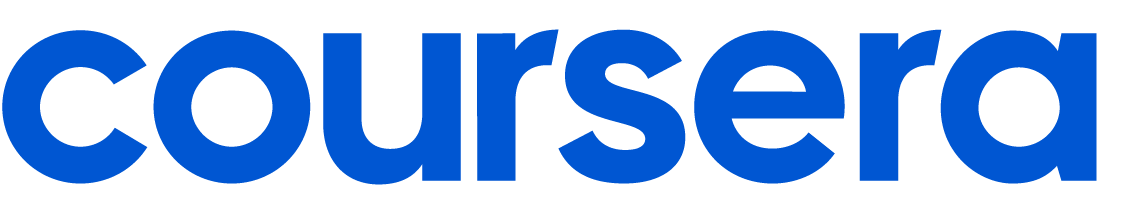

# Welcome to the Data Science Coding Challange!

Test your skills in a real-world coding challenge. Coding Challenges provide CS & DS Coding Competitions with Prizes and achievement badges!

CS & DS learners want to be challenged as a way to evaluate if they’re job ready. So, why not create fun challenges and give winners something truly valuable such as complimentary access to select Data Science courses, or the ability to receive an achievement badge on their Coursera Skills Profile - highlighting their performance to recruiters.

## Introduction

In this challenge, you'll get the opportunity to tackle one of the most industry-relevant maching learning problems with a unique dataset that will put your modeling skills to the test. Subscription services are leveraged by companies across many industries, from fitness to video streaming to retail. One of the primary objectives of companies with subscription services is to decrease churn and ensure that users are retained as subscribers. In order to do this efficiently and systematically, many companies employ machine learning to predict which users are at the highest risk of churn, so that proper interventions can be effectively deployed to the right audience.

In this challenge, we will be tackling the churn prediction problem on a very unique and interesting group of subscribers on a video streaming service! 

Imagine that you are a new data scientist at this video streaming company and you are tasked with building a model that can predict which existing subscribers will continue their subscriptions for another month. We have provided a dataset that is a sample of subscriptions that were initiated in 2021, all snapshotted at a particular date before the subscription was cancelled. Subscription cancellation can happen for a multitude of reasons, including:
* the customer completes all content they were interested in, and no longer need the subscription
* the customer finds themselves to be too busy and cancels their subscription until a later time
* the customer determines that the streaming service is not the best fit for them, so they cancel and look for something better suited

Regardless the reason, this video streaming company has a vested interest in understanding the likelihood of each individual customer to churn in their subscription so that resources can be allocated appropriately to support customers. In this challenge, you will use your machine learning toolkit to do just that!

## Understanding the Datasets

### Train vs. Test
In this competition, you’ll gain access to two datasets that are samples of past subscriptions of a video streaming platform that contain information about the customer, the customers streaming preferences, and their activity in the subscription thus far. One dataset is titled `train.csv` and the other is titled `test.csv`.

`train.csv` contains 70% of the overall sample (243,787 subscriptions to be exact) and importantly, will reveal whether or not the subscription was continued into the next month (the “ground truth”).

The `test.csv` dataset contains the exact same information about the remaining segment of the overall sample (104,480 subscriptions to be exact), but does not disclose the “ground truth” for each subscription. It’s your job to predict this outcome!

Using the patterns you find in the `train.csv` data, predict whether the subscriptions in `test.csv` will be continued for another month, or not.

### Dataset descriptions
Both `train.csv` and `test.csv` contain one row for each unique subscription. For each subscription, a single observation (`CustomerID`) is included during which the subscription was active. 

In addition to this identifier column, the `train.csv` dataset also contains the target label for the task, a binary column `Churn`.

Besides that column, both datasets have an identical set of features that can be used to train your model to make predictions. Below you can see descriptions of each feature. Familiarize yourself with them so that you can harness them most effectively for this machine learning task!

In [1]:
import pandas as pd
data_descriptions = pd.read_csv('data_descriptions.csv')
pd.set_option('display.max_colwidth', None)
data_descriptions

,Column_name,Column_type,Data_type,Description
0,AccountAge,Feature,integer,The age of the user's account in months.
1,MonthlyCharges,Feature,float,The amount charged to the user on a monthly basis.
2,TotalCharges,Feature,float,The total charges incurred by the user over the account's lifetime.
3,SubscriptionType,Feature,object,"The type of subscription chosen by the user (Basic, Standard, or Premium)."
4,PaymentMethod,Feature,string,The method of payment used by the user.
5,PaperlessBilling,Feature,string,Indicates whether the user has opted for paperless billing (Yes or No).
6,ContentType,Feature,string,"The type of content preferred by the user (Movies, TV Shows, or Both)."
7,MultiDeviceAccess,Feature,string,Indicates whether the user has access to the service on multiple devices (Yes or No).
8,DeviceRegistered,Feature,string,"The type of device registered by the user (TV, Mobile, Tablet, or Computer)."
9,ViewingHoursPerWeek,Feature,float,The number of hours the user spends watching content per week.


## How to Submit your Predictions to Coursera
Submission Format:

In this notebook you should follow the steps below to explore the data, train a model using the data in `train.csv`, and then score your model using the data in `test.csv`. Your final submission should be a dataframe (call it `prediction_df` with two columns and exactly 104,480 rows (plus a header row). The first column should be `CustomerID` so that we know which prediction belongs to which observation. The second column should be called `predicted_probability` and should be a numeric column representing the __likellihood that the subscription will churn__.

Your submission will show an error if you have extra columns (beyond `CustomerID` and `predicted_probability`) or extra rows. The order of the rows does not matter.

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

To determine your final score, we will compare your `predicted_probability` predictions to the source of truth labels for the observations in `test.csv` and calculate the [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html). We choose this metric because we not only want to be able to predict which subscriptions will be retained, but also want a well-calibrated likelihood score that can be used to target interventions and support most accurately.

## Import Python Modules

First, import the primary modules that will be used in this project. Remember as this is an open-ended project please feel free to make use of any of your favorite libraries that you feel may be useful for this challenge. For example some of the following popular packages may be useful:

- pandas
- numpy
- Scipy
- Scikit-learn
- keras
- maplotlib
- seaborn
- etc, etc

In [2]:
# Import required packages

# Data packages
import pandas as pd
import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Import any other packages you may want to use
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
#sklearn modules for Model Evaluation & Improvement:
    
# from sklearn.metrics import confusion_matrix, accuracy_score 
# from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import KFold
# from sklearn import feature_selection
from sklearn import model_selection
# from sklearn import metrics
# from sklearn.metrics import classification_report, precision_recall_curve
# from sklearn.metrics import auc, roc_auc_score, roc_curve
# from sklearn.metrics import make_scorer, recall_score, log_loss
# from sklearn.metrics import average_precision_score

## Load the Data

Let's start by loading the dataset `train.csv` into a dataframe `train_df`, and `test.csv` into a dataframe `test_df` and display the shape of the dataframes.

In [5]:
train_df = pd.read_csv("train.csv")
print('train_df Shape:', train_df.shape)
train_df.head()

train_df Shape: (243787, 21)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,No,Both,No,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,Male,3,No,No,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,Yes,Movies,No,Tablet,32.450568,...,18,Action,3.478632,8,Male,23,No,Yes,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,Yes,Movies,No,Computer,7.395160,...,23,Fantasy,4.238824,6,Male,1,Yes,Yes,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,No,TV Shows,No,Tablet,27.960389,...,30,Drama,4.276013,2,Male,24,Yes,Yes,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,Yes,TV Shows,No,TV,20.083397,...,20,Comedy,3.616170,4,Female,0,No,No,4LGYPK7VOL,0


In [6]:
test_df = pd.read_csv("test.csv")
print('test_df Shape:', test_df.shape)
test_df.head()

test_df Shape: (104480, 20)


,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID
0,38,17.869374,679.036195,Premium,Mailed check,No,TV Shows,No,TV,29.126308,122.274031,42,Comedy,3.522724,2,Male,23,No,No,O1W6BHP6RM
1,77,9.912854,763.289768,Basic,Electronic check,Yes,TV Shows,No,TV,36.873729,57.093319,43,Action,2.021545,2,Female,22,Yes,No,LFR4X92X8H
2,5,15.019011,75.095057,Standard,Bank transfer,No,TV Shows,Yes,Computer,7.601729,140.414001,14,Sci-Fi,4.806126,2,Female,22,No,Yes,QM5GBIYODA
3,88,15.357406,1351.451692,Standard,Electronic check,No,Both,Yes,Tablet,35.586430,177.002419,14,Comedy,4.943900,0,Female,23,Yes,Yes,D9RXTK2K9F
4,91,12.406033,1128.949004,Standard,Credit card,Yes,TV Shows,Yes,Tablet,23.503651,70.308376,6,Drama,2.846880,6,Female,0,No,No,ENTCCHR1LR


## Explore, Clean, Validate, and Visualize the Data (optional)

Feel free to explore, clean, validate, and visualize the data however you see fit for this competition to help determine or optimize your predictive model. Please note - the final autograding will only be on the accuracy of the `prediction_df` predictions.

In [7]:
train_df.describe()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize,Churn
count,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000,243787.000000
mean,60.083758,12.490695,750.741017,20.502179,92.264061,24.503513,3.002713,4.504186,12.018508,0.181232
std,34.285143,4.327615,523.073273,11.243753,50.505243,14.421174,1.155259,2.872548,7.193034,0.385211
min,1.000000,4.990062,4.991154,1.000065,5.000547,0.000000,1.000007,0.000000,0.000000,0.000000
25%,30.000000,8.738543,329.147027,10.763953,48.382395,12.000000,2.000853,2.000000,6.000000,0.000000
50%,60.000000,12.495555,649.878487,20.523116,92.249992,24.000000,3.002261,4.000000,12.000000,0.000000
75%,90.000000,16.238160,1089.317362,30.219396,135.908048,37.000000,4.002157,7.000000,18.000000,0.000000
max,119.000000,19.989957,2378.723844,39.999723,179.999275,49.000000,4.999989,9.000000,24.000000,1.000000


In [8]:
train_df.dtypes

AccountAge                    int64
MonthlyCharges              float64
TotalCharges                float64
SubscriptionType             object
PaymentMethod                object
PaperlessBilling             object
ContentType                  object
MultiDeviceAccess            object
DeviceRegistered             object
ViewingHoursPerWeek         float64
AverageViewingDuration      float64
ContentDownloadsPerMonth      int64
GenrePreference              object
UserRating                  float64
SupportTicketsPerMonth        int64
Gender                       object
WatchlistSize                 int64
ParentalControl              object
SubtitlesEnabled             object
CustomerID                   object
Churn                         int64
dtype: object

In [9]:
train_df.columns.to_series().groupby(train_df.dtypes).groups

{int64: ['AccountAge', 'ContentDownloadsPerMonth', 'SupportTicketsPerMonth', 'WatchlistSize', 'Churn'], float64: ['MonthlyCharges', 'TotalCharges', 'ViewingHoursPerWeek', 'AverageViewingDuration', 'UserRating'], object: ['SubscriptionType', 'PaymentMethod', 'PaperlessBilling', 'ContentType', 'MultiDeviceAccess', 'DeviceRegistered', 'GenrePreference', 'Gender', 'ParentalControl', 'SubtitlesEnabled', 'CustomerID']}

In [10]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243787 entries, 0 to 243786
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   AccountAge                243787 non-null  int64  
 1   MonthlyCharges            243787 non-null  float64
 2   TotalCharges              243787 non-null  float64
 3   SubscriptionType          243787 non-null  object 
 4   PaymentMethod             243787 non-null  object 
 5   PaperlessBilling          243787 non-null  object 
 6   ContentType               243787 non-null  object 
 7   MultiDeviceAccess         243787 non-null  object 
 8   DeviceRegistered          243787 non-null  object 
 9   ViewingHoursPerWeek       243787 non-null  float64
 10  AverageViewingDuration    243787 non-null  float64
 11  ContentDownloadsPerMonth  243787 non-null  int64  
 12  GenrePreference           243787 non-null  object 
 13  UserRating                243787 non-null  f

In [11]:
print(train_df.isna().any())

AccountAge                  False
MonthlyCharges              False
TotalCharges                False
SubscriptionType            False
PaymentMethod               False
PaperlessBilling            False
ContentType                 False
MultiDeviceAccess           False
DeviceRegistered            False
ViewingHoursPerWeek         False
AverageViewingDuration      False
ContentDownloadsPerMonth    False
GenrePreference             False
UserRating                  False
SupportTicketsPerMonth      False
Gender                      False
WatchlistSize               False
ParentalControl             False
SubtitlesEnabled            False
CustomerID                  False
Churn                       False
dtype: bool


In [12]:
print(train_df.nunique())

AccountAge                     119
MonthlyCharges              243787
TotalCharges                243787
SubscriptionType                 3
PaymentMethod                    4
PaperlessBilling                 2
ContentType                      3
MultiDeviceAccess                2
DeviceRegistered                 4
ViewingHoursPerWeek         243787
AverageViewingDuration      243787
ContentDownloadsPerMonth        50
GenrePreference                  5
UserRating                  243787
SupportTicketsPerMonth          10
Gender                           2
WatchlistSize                   25
ParentalControl                  2
SubtitlesEnabled                 2
CustomerID                  243787
Churn                            2
dtype: int64


In [13]:
for col in train_df.columns:
    if col != 'CustomerID' and train_df[col].dtype != np.float64:
        print(train_df[col].value_counts())
        print(train_df[col].dtype)
        print()
        print()
        print()

AccountAge
93     2168
95     2157
19     2148
74     2143
99     2141
       ... 
5      1967
20     1957
10     1953
107    1942
108    1931
Name: count, Length: 119, dtype: int64
int64



SubscriptionType
Standard    81920
Basic       81050
Premium     80817
Name: count, dtype: int64
object



PaymentMethod
Electronic check    61313
Credit card         60924
Bank transfer       60797
Mailed check        60753
Name: count, dtype: int64
object



PaperlessBilling
No     121980
Yes    121807
Name: count, dtype: int64
object



ContentType
Both        81737
TV Shows    81145
Movies      80905
Name: count, dtype: int64
object



MultiDeviceAccess
No     122035
Yes    121752
Name: count, dtype: int64
object



DeviceRegistered
Computer    61147
Tablet      61143
Mobile      60914
TV          60583
Name: count, dtype: int64
object



ContentDownloadsPerMonth
17    4999
8     4996
39    4995
23    4959
40    4952
43    4952
44    4951
4     4949
33    4929
42    4922
11    4917
3     4914
1

In [14]:
categorical_cols = train_df.select_dtypes(include=['object']).columns.to_list()
categorical_cols.remove('CustomerID')
numerical_cols = train_df.select_dtypes(include=['int64','float64']).columns.to_list()
numerical_cols.remove('Churn')

In [16]:
numerical_cols

['AccountAge',
 'MonthlyCharges',
 'TotalCharges',
 'ViewingHoursPerWeek',
 'AverageViewingDuration',
 'ContentDownloadsPerMonth',
 'UserRating',
 'SupportTicketsPerMonth',
 'WatchlistSize']

In [17]:
categorical_cols

['SubscriptionType',
 'PaymentMethod',
 'PaperlessBilling',
 'ContentType',
 'MultiDeviceAccess',
 'DeviceRegistered',
 'GenrePreference',
 'Gender',
 'ParentalControl',
 'SubtitlesEnabled']

In [18]:
# Label Encoding will be used for columns with <=2 unique value 

In [19]:
le = LabelEncoder()

In [20]:
le_count = 0
for col in train_df.columns[1:]:
    if train_df[col].dtype == 'object':
        if len(list(train_df[col].unique())) < 3:
            le.fit(train_df[col])
            train_df[col] = le.transform(train_df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

5 columns were label encoded.


In [21]:
train_df.head()

,AccountAge,MonthlyCharges,TotalCharges,SubscriptionType,PaymentMethod,PaperlessBilling,ContentType,MultiDeviceAccess,DeviceRegistered,ViewingHoursPerWeek,...,ContentDownloadsPerMonth,GenrePreference,UserRating,SupportTicketsPerMonth,Gender,WatchlistSize,ParentalControl,SubtitlesEnabled,CustomerID,Churn
0,20,11.055215,221.104302,Premium,Mailed check,0,Both,0,Mobile,36.758104,...,10,Sci-Fi,2.176498,4,1,3,0,0,CB6SXPNVZA,0
1,57,5.175208,294.986882,Basic,Credit card,1,Movies,0,Tablet,32.450568,...,18,Action,3.478632,8,1,23,0,1,S7R2G87O09,0
2,73,12.106657,883.785952,Basic,Mailed check,1,Movies,0,Computer,7.395160,...,23,Fantasy,4.238824,6,1,1,1,1,EASDC20BDT,0
3,32,7.263743,232.439774,Basic,Electronic check,0,TV Shows,0,Tablet,27.960389,...,30,Drama,4.276013,2,1,24,1,1,NPF69NT69N,0
4,57,16.953078,966.325422,Premium,Electronic check,1,TV Shows,0,TV,20.083397,...,20,Comedy,3.616170,4,0,0,0,0,4LGYPK7VOL,0


In [22]:
le_count = 0
for col in test_df.columns[1:]:
    if test_df[col].dtype == 'object':
        if len(list(test_df[col].unique())) < 3:
            le.fit(test_df[col])
            test_df[col] = le.transform(test_df[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

5 columns were label encoded.


In [23]:
## Visualization :

In [24]:
### Histogram

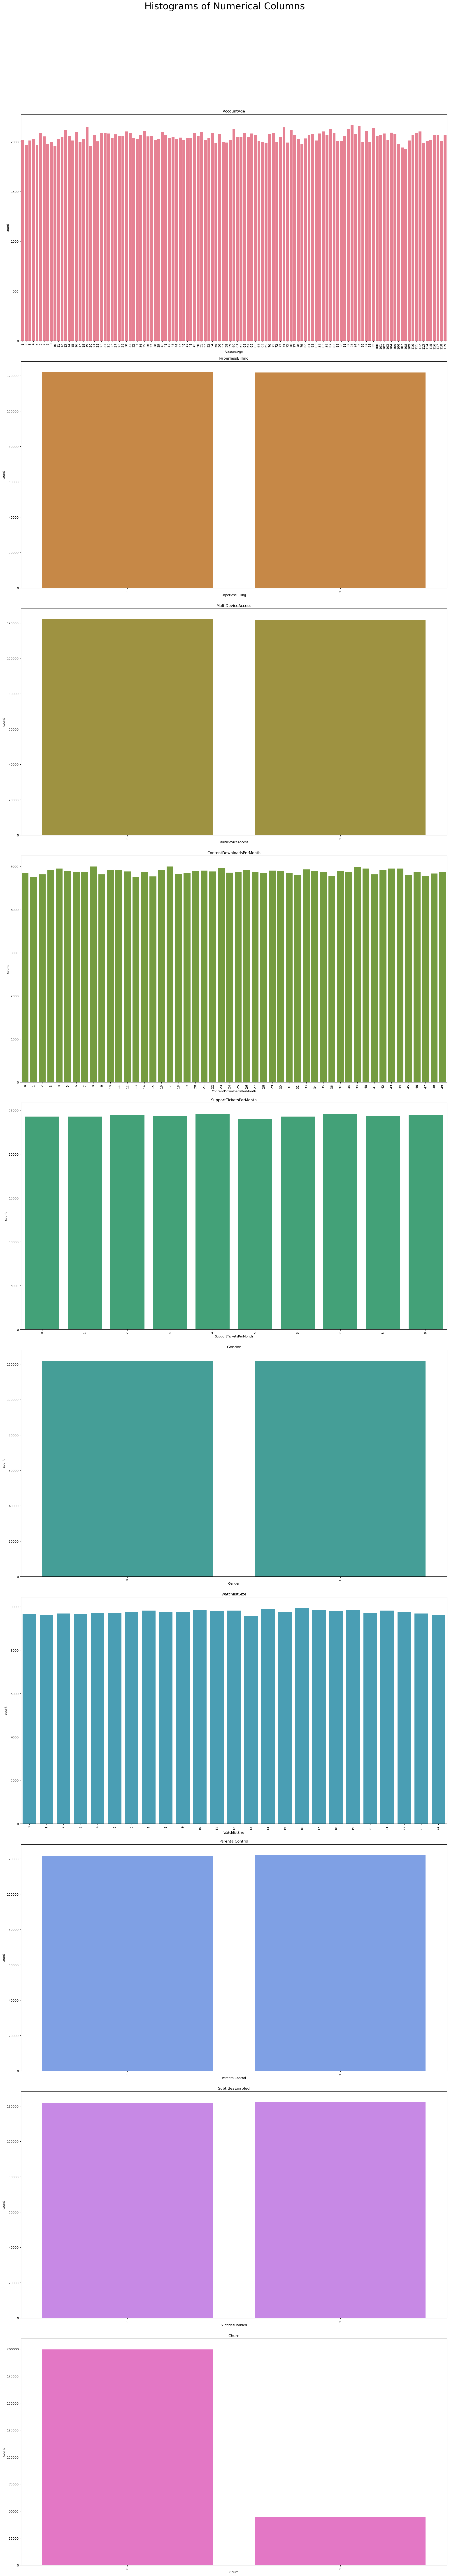

In [25]:
# Select only columns with int64 data type
numerical_columns = train_df.select_dtypes(include='int64')

# Set up the subplots
fig, axes = plt.subplots(nrows=10, ncols=1, figsize=(20, 120))
fig.suptitle('Histograms of Numerical Columns\n', horizontalalignment="center", 
             fontstyle="normal", fontsize=30, fontfamily="sans-serif")

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through each numerical column
colors = sns.color_palette("husl", n_colors=len(numerical_columns.columns))
for i, (column, color) in enumerate(zip(numerical_columns.columns, colors)):
    ax = axes[i]
    
    sns.countplot(x=numerical_columns[column], color=color, ax=ax)
    
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

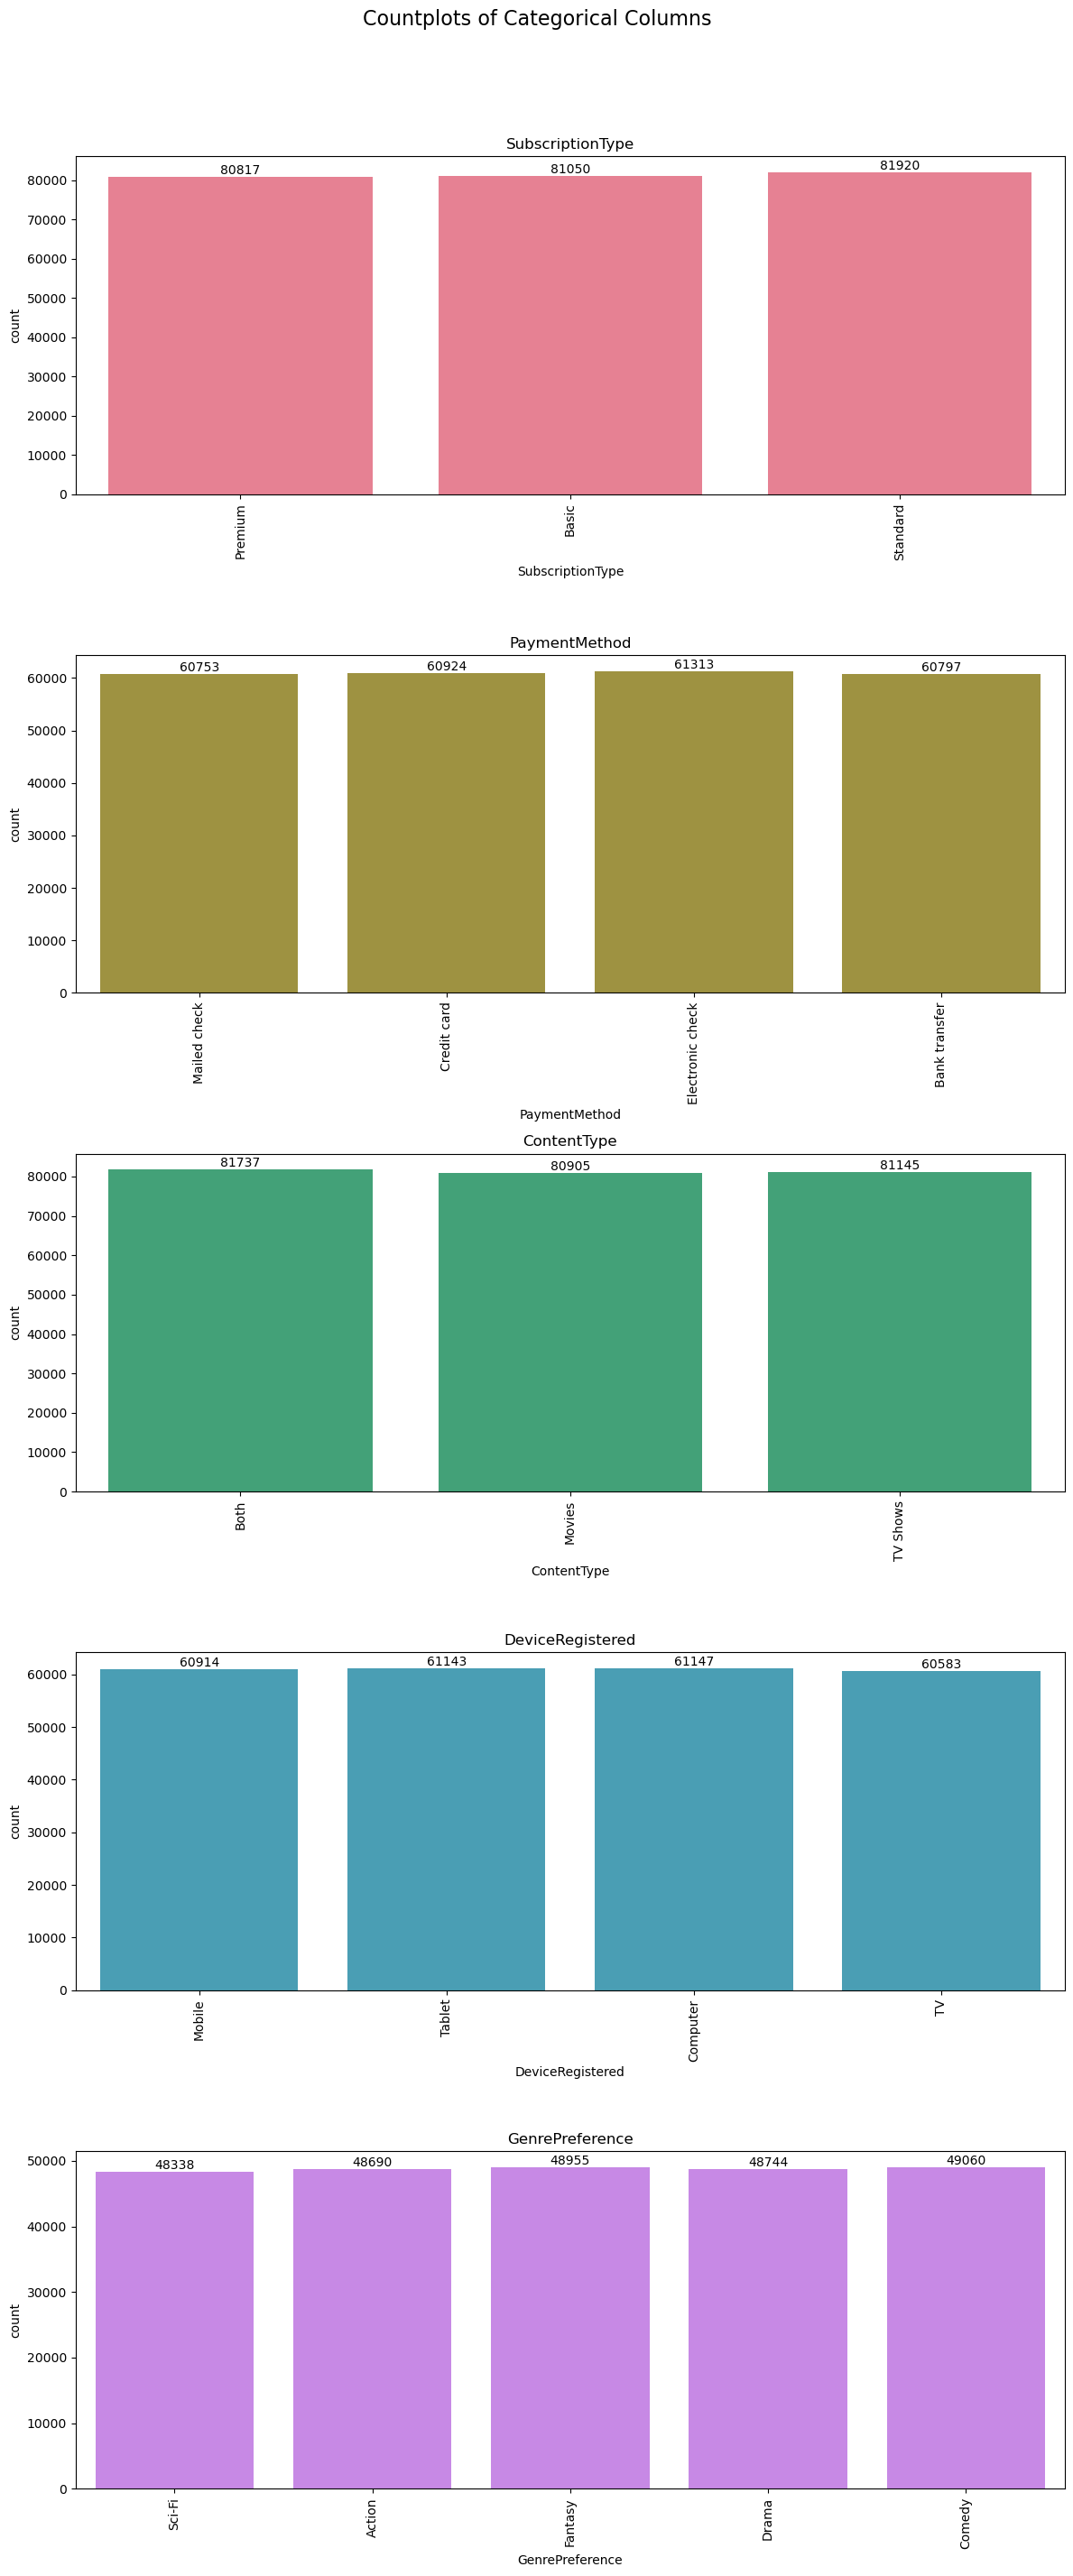

In [26]:
# Assuming 'CustomerID' is the column you want to exclude
exclude_column = 'CustomerID'

# Select columns with object data type (excluding 'CustomerID')
categorical_columns = train_df.select_dtypes(include='object').drop(columns=exclude_column, errors='ignore')

# Set up the subplots with increased height and width
fig, axes = plt.subplots(nrows=len(categorical_columns.columns), ncols=1, figsize=(12, 6 * len(categorical_columns.columns)))
fig.suptitle('Countplots of Categorical Columns', horizontalalignment="center", fontsize=16)

# Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

# Iterate through each categorical column
colors = sns.color_palette("husl", n_colors=len(categorical_columns.columns))
for i, (column, color) in enumerate(zip(categorical_columns.columns, colors)):
    ax = axes[i]
    
    # Use Seaborn to create a countplot
    sns.countplot(x=categorical_columns[column], color=color, ax=ax)
    
    # Add more height on top of each bar
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.2, f'{height:.0f}', ha='center', va='bottom')  # Adjusted height value
    
    ax.set_title(column)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [27]:
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va
        )

In [28]:
def get_hist_plot_vs_customers(col):
    subscription_split = train_df[[ "CustomerID", col]]
    sectors = subscription_split.groupby(col)
    subscription_split = pd.DataFrame(sectors["CustomerID"].count())
    subscription_split.rename(columns={'CustomerID':'No. of customers'}, inplace=True)

    ax =  subscription_split[["No. of customers"]].plot.bar(title = f'Customers by {col}',legend =True, table = False, 
    grid = False,  subplots = False,figsize =(12, 7), color ='cornflowerblue', 
    fontsize = 15, stacked=False)

    plt.ylabel('No. of Customers\n',
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")

    plt.xlabel(col,
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")

    plt.title(f'Customers by {col}',
    horizontalalignment="center",fontstyle = "normal", 
    fontsize = "22", fontfamily = "sans-serif")

    plt.legend(loc='upper right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    x_labels = np.array(subscription_split[["No. of customers"]])

    ax.legend().set_visible(False)
    add_value_labels(ax)
    plt.show()

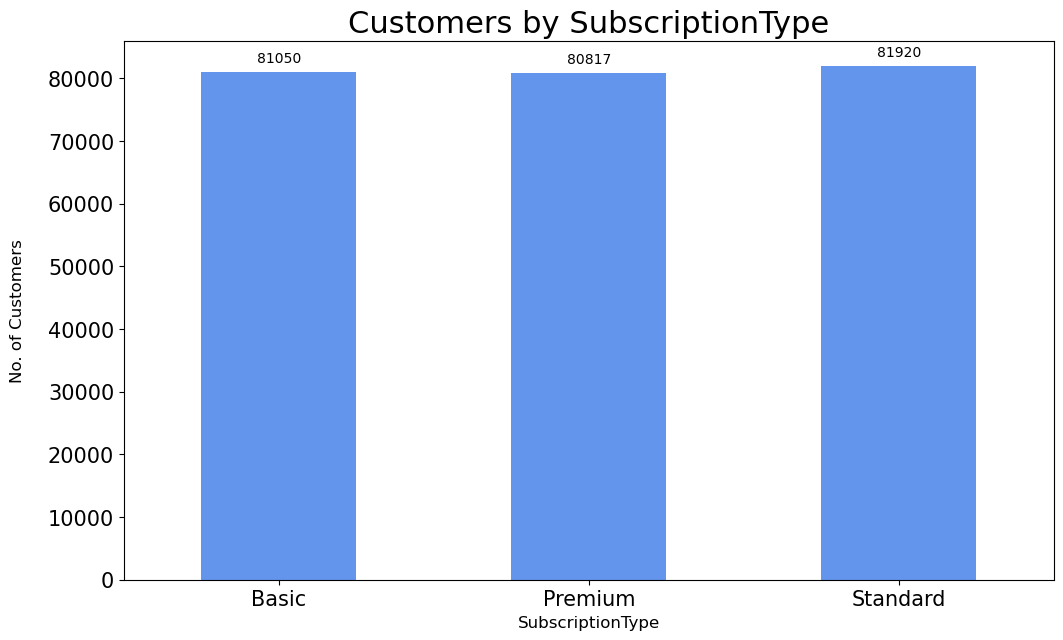

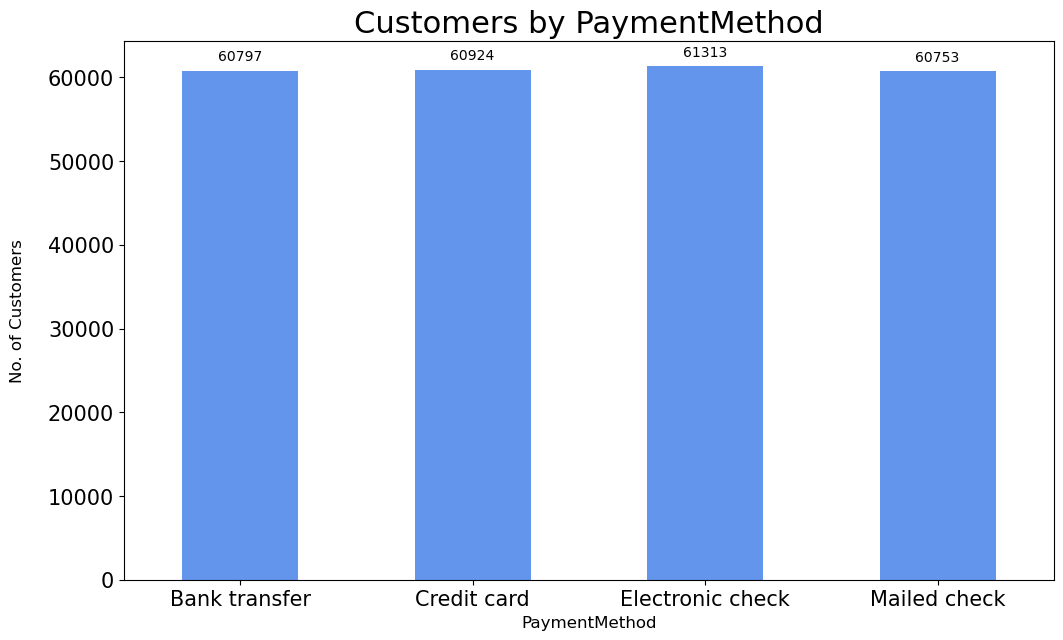

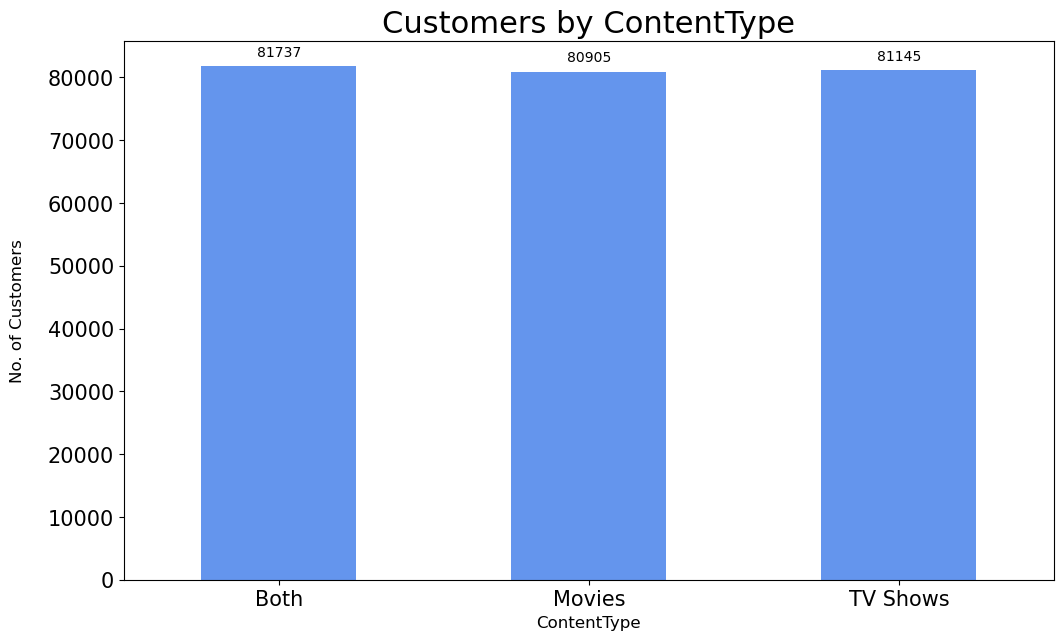

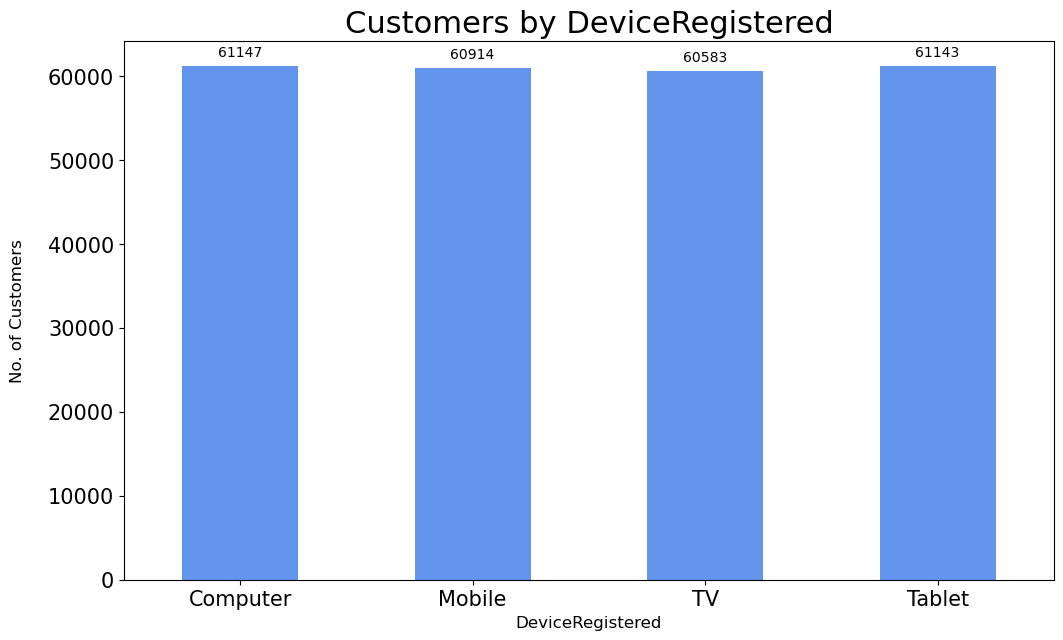

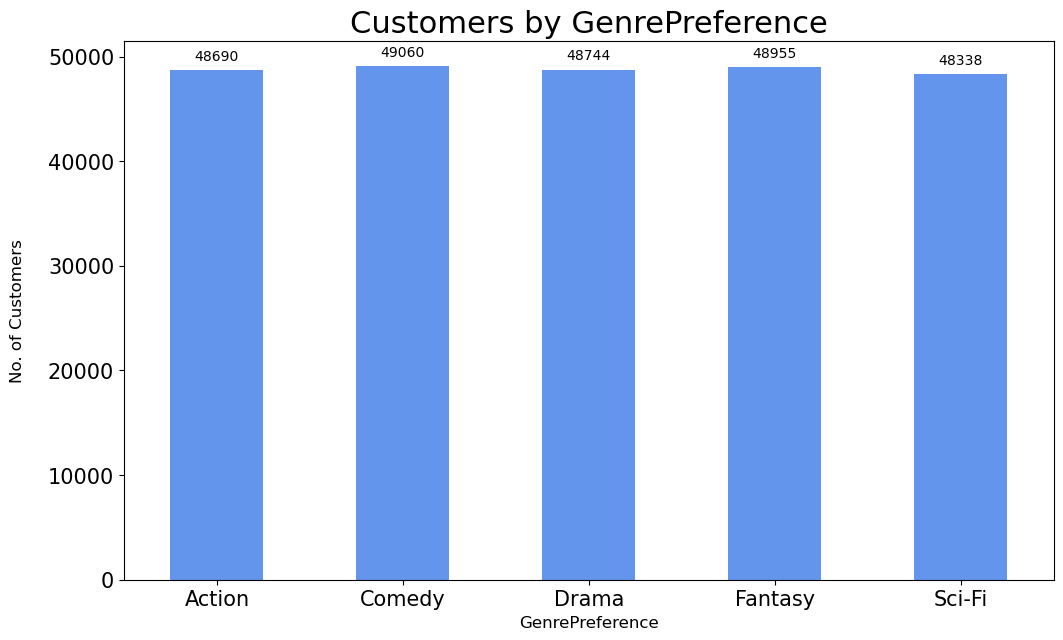

In [29]:
for col in train_df.select_dtypes(include='object').drop(columns=exclude_column, errors='ignore'):
    get_hist_plot_vs_customers(col)

In [30]:
## Churn rate by categorical variables:

/var/folders/03/rl5n9m_j38s20pk33dq1qktw0000gn/T/ipykernel_22728/2914563431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))


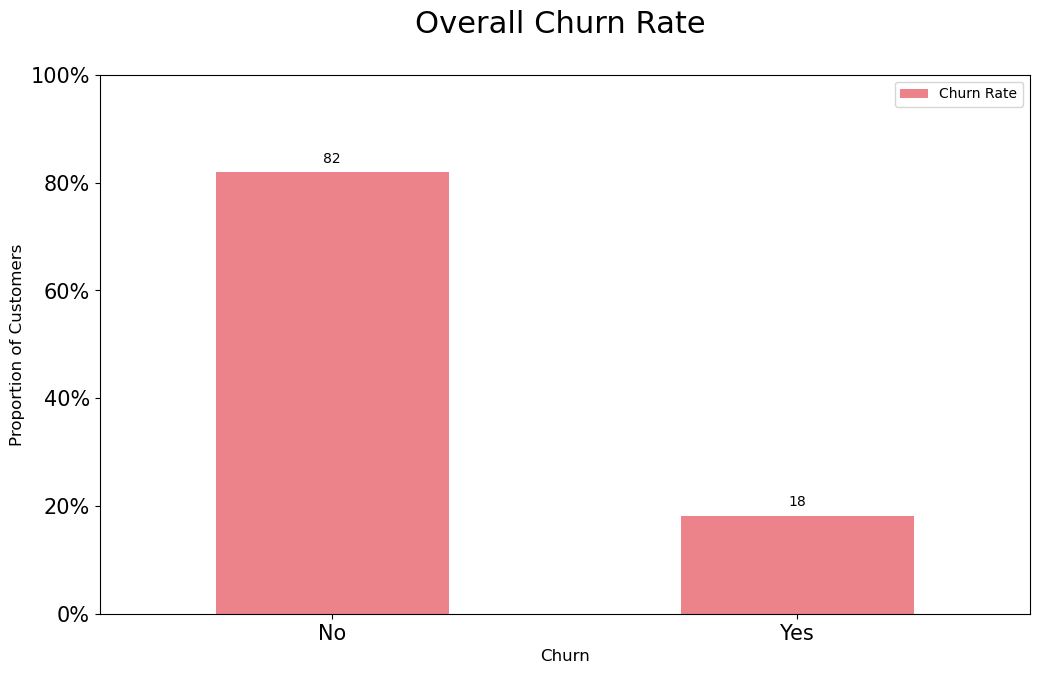

In [31]:
import matplotlib.ticker as mtick
churn_rate = train_df[["Churn", "CustomerID"]]
churn_rate["churn_label"] = pd.Series(np.where((churn_rate["Churn"] == 0), "No", "Yes"))
sectors = churn_rate .groupby("churn_label")
churn_rate = pd.DataFrame(sectors["CustomerID"].count())
churn_rate ["Churn Rate"] = (churn_rate ["CustomerID"]/ sum(churn_rate ["CustomerID"]) )*100
ax =  churn_rate[["Churn Rate"]].plot.bar(title = 'Overall Churn Rate',legend =True, table = False,grid = False,  subplots = False, 
figsize =(12, 7), color = '#ec838a', fontsize = 15, stacked=False, 
ylim =(0,100))
plt.ylabel('Proportion of Customers',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('Churn',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Overall Churn Rate \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
x_labels = np.array(churn_rate[["CustomerID"]])

add_value_labels(ax)
ax.autoscale(enable=False, axis='both', tight=False)

In [32]:
def churn_rate_vs_categorical(col):
    categorical_columns = train_df.select_dtypes(include='object').drop(columns=exclude_column, errors='ignore')
    contract_churn = train_df.groupby([col,'Churn']).size().unstack()
    ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7))
    plt.ylabel('Proportion of Customers\n', horizontalalignment="center",fontstyle = "normal", 
    fontsize = "large", fontfamily = "sans-serif")
    plt.xlabel(col, horizontalalignment="center", fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
    plt.title(f'Churn Rate by {col}', horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
    plt.legend(loc='upper right', fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy() 
        ax.text(x+width/2, 
                y+height/2, 
                '{:.1f}%'.format(height), 
                horizontalalignment='center', 
                verticalalignment='center')
    ax.autoscale(enable=False, axis='both', tight=False)

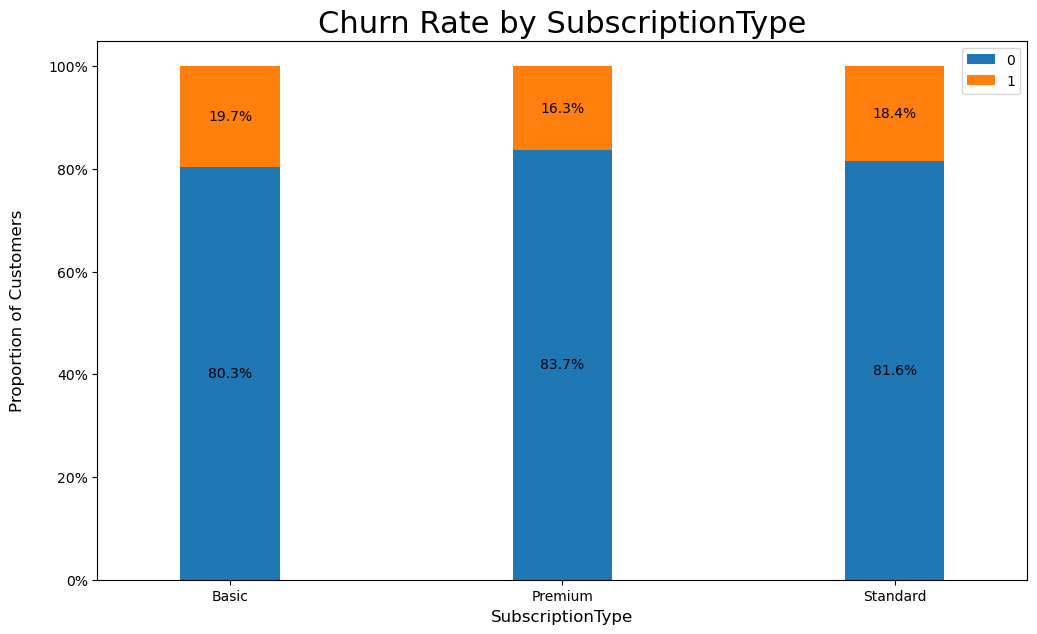

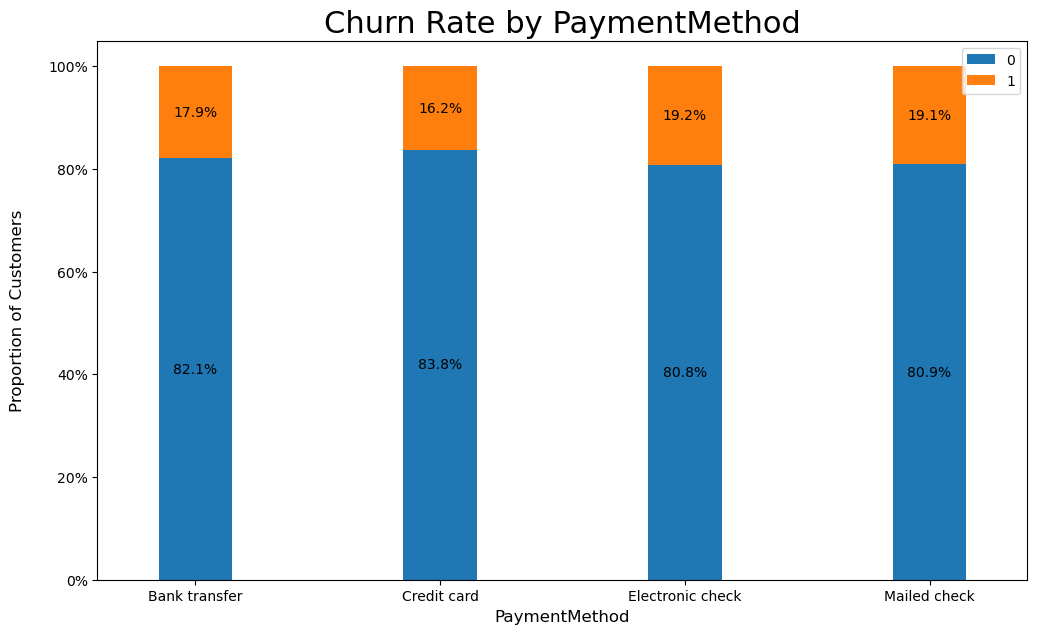

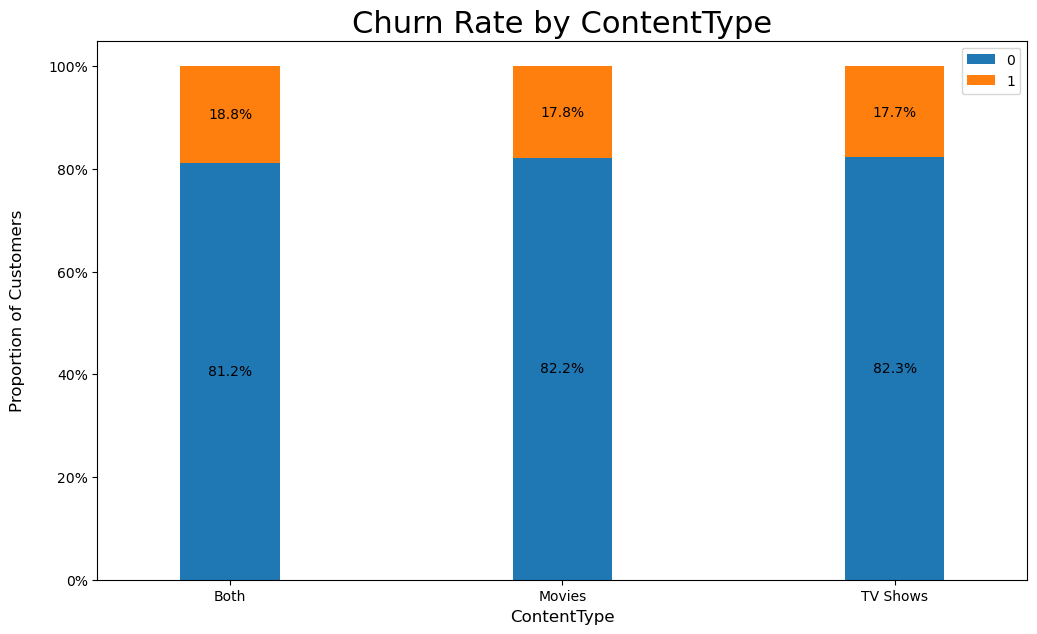

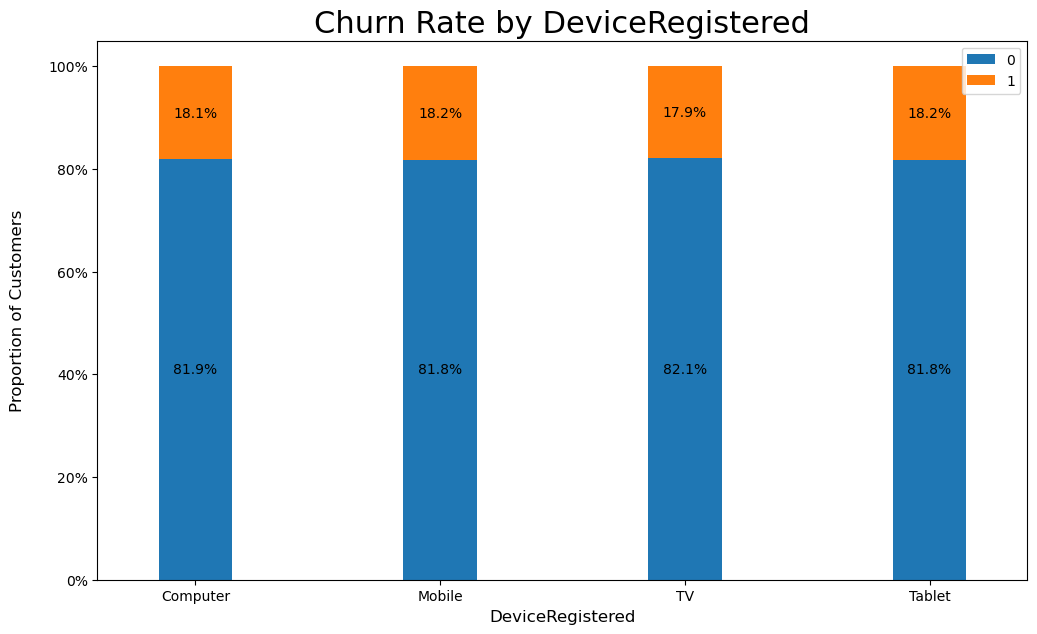

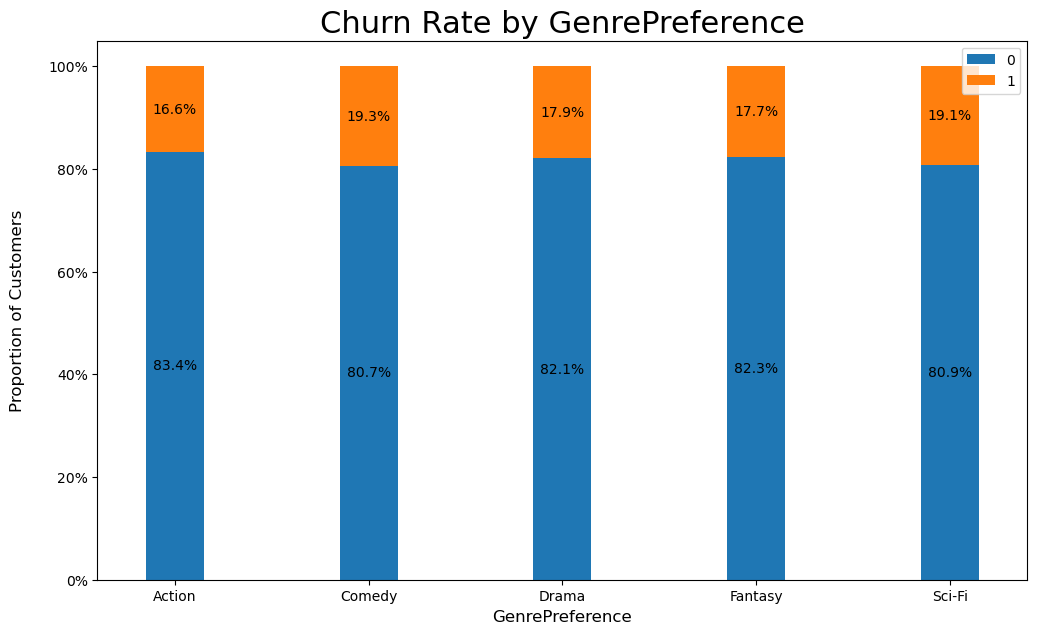

In [33]:
for col in categorical_columns.columns:
    churn_rate_vs_categorical(col)

In [34]:
train_df.groupby(['ContentType','GenrePreference']).size().unstack()

GenrePreference,Action,Comedy,Drama,Fantasy,Sci-Fi
ContentType,,,,,
Both,16447,16458,16292,16307,16233
Movies,16163,16262,16149,16245,16086
TV Shows,16080,16340,16303,16403,16019


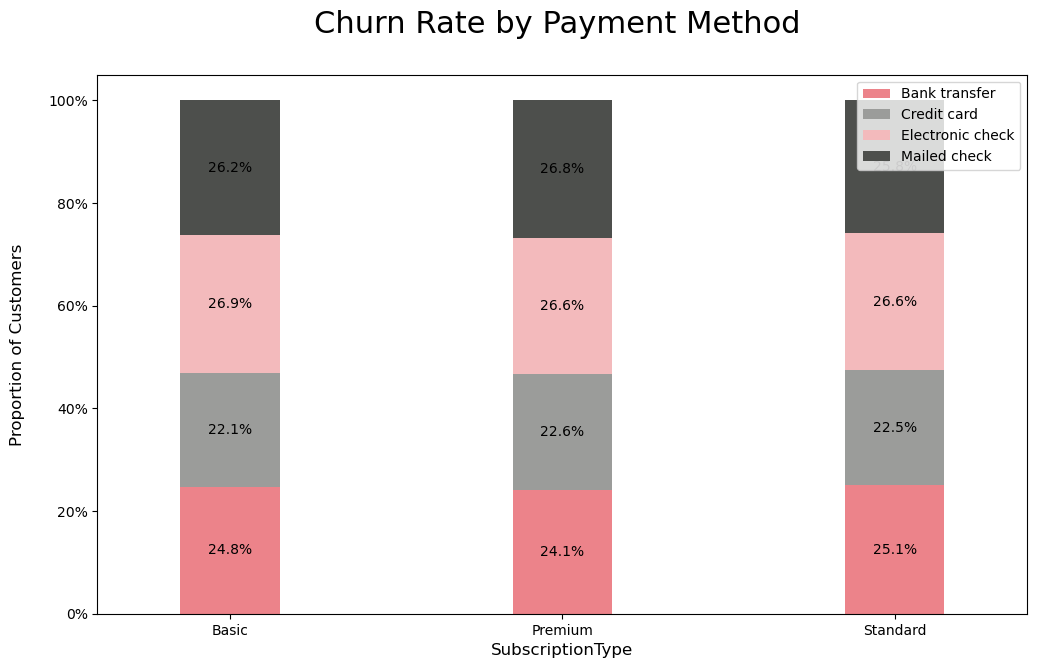

In [35]:
import matplotlib.ticker as mtick
contract_churn = train_df[train_df['Churn'] == 1].groupby(['SubscriptionType', 'PaymentMethod']).size().unstack()
contract_churn.rename(columns=
{0:'No', 1:'Yes'}, inplace=True)
colors  = ['#ec838a','#9b9c9a', '#f3babc' , '#4d4f4c']
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(
kind='bar',width = 0.3,stacked = True,rot = 0,figsize = (12,7),
color = colors)
plt.ylabel('Proportion of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('SubscriptionType',horizontalalignment="center",fontstyle = "normal", fontsize = "large", fontfamily = "sans-serif")
plt.title('Churn Rate by Payment Method \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, y+height/2, '{:.1f}%'.format(height), horizontalalignment='center', verticalalignment='center')
ax.autoscale(enable=False, axis='both', tight=False)

In [41]:
train_df[numerical_cols].corr()

,AccountAge,MonthlyCharges,TotalCharges,ViewingHoursPerWeek,AverageViewingDuration,ContentDownloadsPerMonth,UserRating,SupportTicketsPerMonth,WatchlistSize
AccountAge,1.000000,0.001706,0.820144,-0.001640,0.000191,0.001220,0.000440,-0.002055,-0.002640
MonthlyCharges,0.001706,1.000000,0.498207,-0.003029,-0.000604,-0.000127,0.000056,0.000071,-0.000540
TotalCharges,0.820144,0.498207,1.000000,-0.003006,0.000860,0.000208,0.000609,-0.001770,-0.001770
ViewingHoursPerWeek,-0.001640,-0.003029,-0.003006,1.000000,0.000949,0.002149,-0.003185,0.000788,-0.000750
AverageViewingDuration,0.000191,-0.000604,0.000860,0.000949,1.000000,-0.002397,-0.000406,-0.000158,0.000749
ContentDownloadsPerMonth,0.001220,-0.000127,0.000208,0.002149,-0.002397,1.000000,0.001294,-0.000497,0.002324
UserRating,0.000440,0.000056,0.000609,-0.003185,-0.000406,0.001294,1.000000,-0.000142,0.002567
SupportTicketsPerMonth,-0.002055,0.000071,-0.001770,0.000788,-0.000158,-0.000497,-0.000142,1.000000,0.001250
WatchlistSize,-0.002640,-0.000540,-0.001770,-0.000750,0.000749,0.002324,0.002567,0.001250,1.000000


<Axes: >

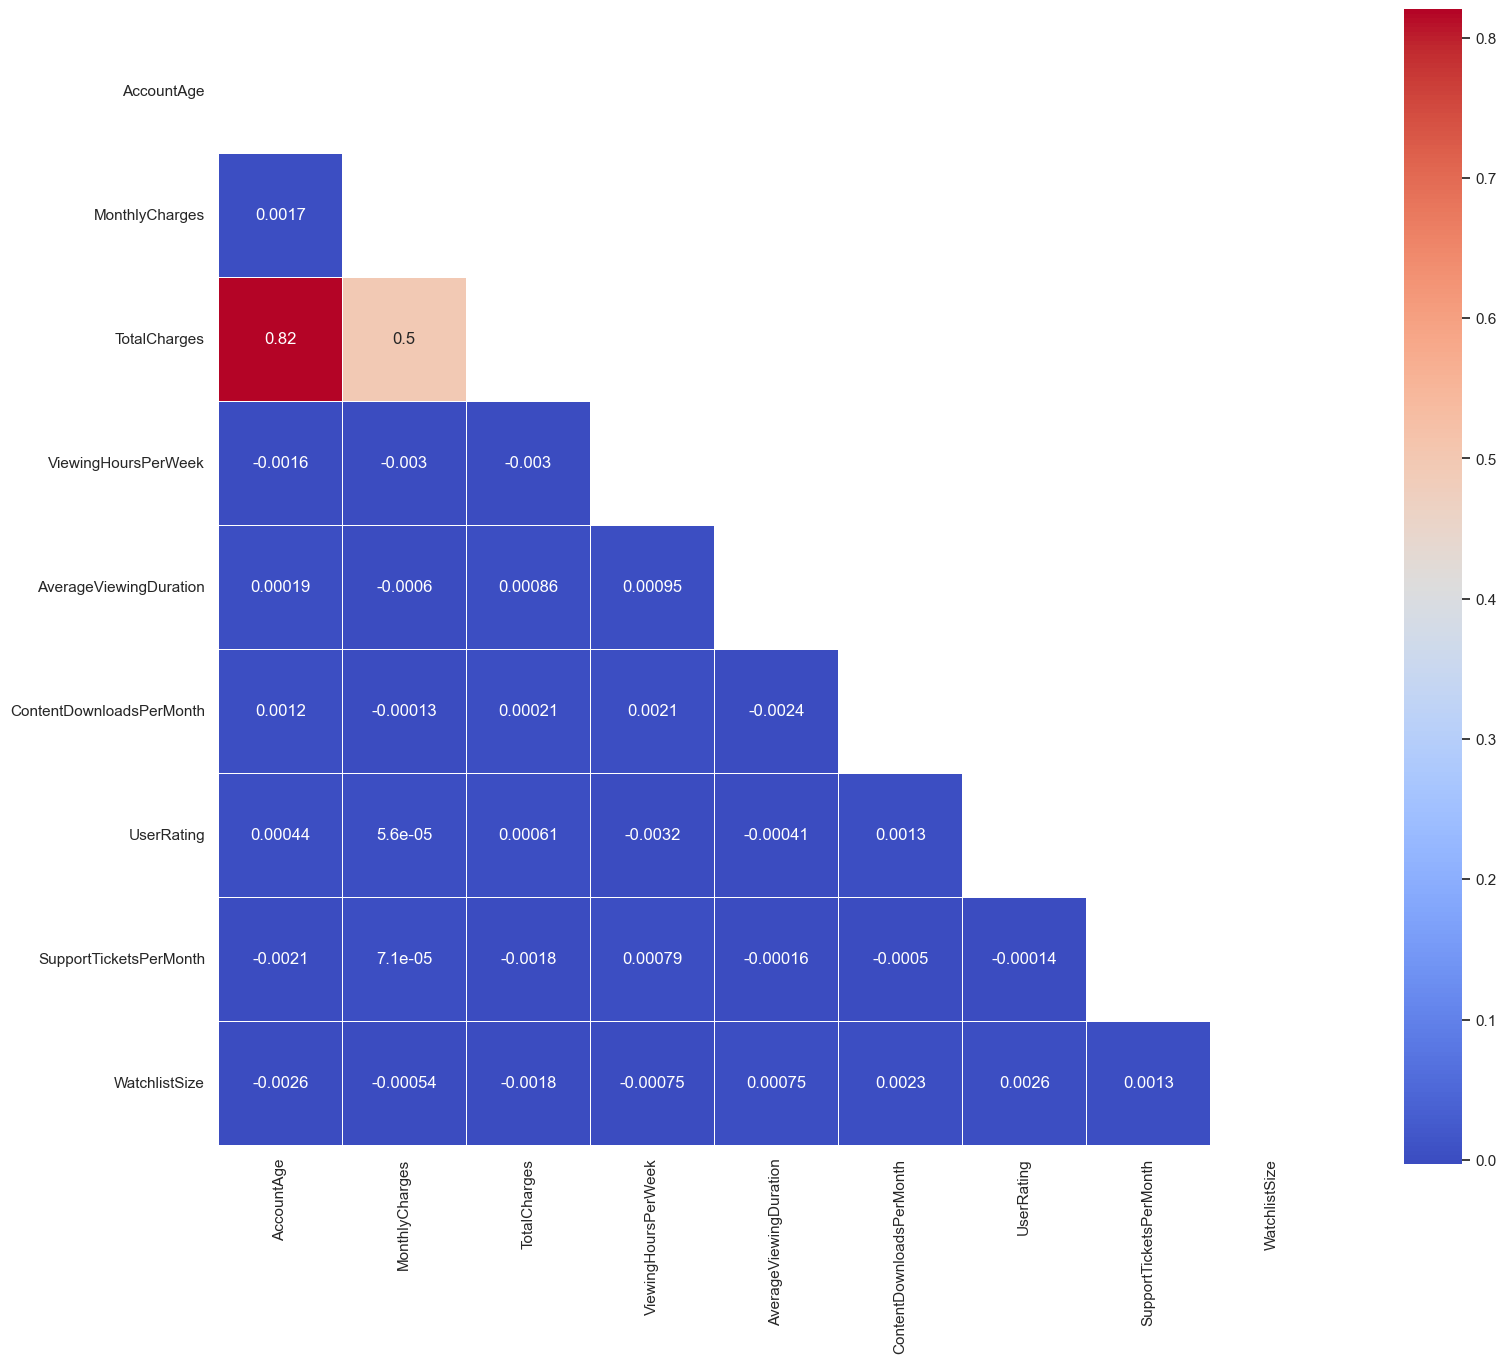

In [46]:
sns.set(style="white")
corr = train_df[numerical_cols].corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(18, 15))
sns.heatmap(corr, annot=True, square=True, mask=mask, cmap='coolwarm', linewidths=.5)

In [ ]:
train_df = pd.get_dummies(train_df, columns=categorical_columns.columns)

In [ ]:
train_df

In [ ]:
dataset = train_df.set_index('CustomerID')
y_train = dataset["Churn"]
X_train = dataset.drop(columns="Churn")

In [ ]:
sc_X = StandardScaler()

numerical_features = X_train.select_dtypes(include=['float64']).columns.union(['AccountAge','ContentDownloadsPerMonth','SupportTicketsPerMonth','WatchlistSize'])

X_train[numerical_features] = sc_X.fit_transform(X_train[numerical_features])

In [ ]:
for col in X_train.columns:
    print(X_train[col][:4])
    print()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = []
models.append(('Logistic Regression', 
               LogisticRegression(solver='liblinear', random_state = 0, class_weight='balanced')))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', 
               RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))

#Evaluating Model Results:
acc_results = []
auc_results = []
names = []

# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)

In [ ]:
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    
    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean()*100, 2),
        round(cv_auc_results.std()*100, 2),
        round(cv_acc_results.mean()*100, 2),
        round(cv_acc_results.std()*100, 2)
    ]
    i += 1
    print(i)
    
model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

## Make predictions (required)

Remember you should create a dataframe named `prediction_df` with exactly 104,480 entries plus a header row attempting to predict the likelihood of churn for subscriptions in `test_df`. Your submission will throw an error if you have extra columns (beyond `CustomerID` and `predicted_probaility`) or extra rows.

The file should have exactly 2 columns:
`CustomerID` (sorted in any order)
`predicted_probability` (contains your numeric predicted probabilities between 0 and 1, e.g. from `estimator.predict_proba(X, y)[:, 1]`)

The naming convention of the dataframe and columns are critical for our autograding, so please make sure to use the exact naming conventions of `prediction_df` with column names `CustomerID` and `predicted_probability`!

### Example prediction submission:

The code below is a very naive prediction method that simply predicts churn using a Dummy Classifier. This is used as just an example showing the submission format required. Please change/alter/delete this code below and create your own improved prediction methods for generating `prediction_df`.

**PLEASE CHANGE CODE BELOW TO IMPLEMENT YOUR OWN PREDICTIONS**

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Fit a dummy classifier on the feature columns in train_df:
dummy_clf = DummyClassifier(strategy="stratified")
dummy_clf.fit(train_df.drop(['CustomerID', 'Churn'], axis=1), train_df.Churn)

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Use our dummy classifier to make predictions on test_df using `predict_proba` method:
predicted_probability = dummy_clf.predict_proba(test_df.drop(['CustomerID'], axis=1))[:, 1]

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# Combine predictions with label column into a dataframe
prediction_df = pd.DataFrame({'CustomerID': test_df[['CustomerID']].values[:, 0],
                             'predicted_probability': predicted_probability})

In [ ]:
### PLEASE CHANGE THIS CODE TO IMPLEMENT YOUR OWN PREDICTIONS

# View our 'prediction_df' dataframe as required for submission.
# Ensure it should contain 104,480 rows and 2 columns 'CustomerID' and 'predicted_probaility'
print(prediction_df.shape)
prediction_df.head(10)

**PLEASE CHANGE CODE ABOVE TO IMPLEMENT YOUR OWN PREDICTIONS**

## Final Tests - **IMPORTANT** - the cells below must be run prior to submission

Below are some tests to ensure your submission is in the correct format for autograding. The autograding process accepts a csv `prediction_submission.csv` which we will generate from our `prediction_df` below. Please run the tests below an ensure no assertion errors are thrown.

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

# Writing to csv for autograding purposes
prediction_df.to_csv("prediction_submission.csv", index=False)
submission = pd.read_csv("prediction_submission.csv")

assert isinstance(submission, pd.DataFrame), 'You should have a dataframe named prediction_df.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.columns[0] == 'CustomerID', 'The first column name should be CustomerID.'
assert submission.columns[1] == 'predicted_probability', 'The second column name should be predicted_probability.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[0] == 104480, 'The dataframe prediction_df should have 104480 rows.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

assert submission.shape[1] == 2, 'The dataframe prediction_df should have 2 columns.'

In [ ]:
# FINAL TEST CELLS - please make sure all of your code is above these test cells

## This cell calculates the auc score and is hidden. Submit Assignment to see AUC score.

## SUBMIT YOUR WORK!

Once we are happy with our `prediction_df` and `prediction_submission.csv` we can now submit for autograding! Submit by using the blue **Submit Assignment** at the top of your notebook. Don't worry if your initial submission isn't perfect as you have multiple submission attempts and will obtain some feedback after each submission!